# Lab 4: Diputados

El objetivo de este lab es que pongas en práctica tus habilidades de recopilación de datos usando web scraping, así como tu capacidad de analizar dichos datos ya que la información se ecuentra estructurada.

## Instrucciones
Desarrolla un programa que recopile la información de cada disputado listado en la página de gobernación: http://sitl.diputados.gob.mx/LXIV_leg/listado_diputados_buscador.php y recopila la siguiente información:

* Nombre del diputado
* Entidad que representa
* Partido político
* Correo electrónico
* Nivel de escolaridad (secundaria, preparatoria, universidad, maestría, doctorado)
* Iniciativas presentadas y estatus ante el Pleno (Tipo de presentación, totales y aprobadas)

Una vez que tengas toda la información capturada en dataframe haz un análisis basado en las siguientes puntos (tu puedes proponer más):
* Cantidad de diputados por partido político
* Niveles de escolaridad
* Niveles de escolaridad por partido político
* ¿Cómo se ve la cantidad de propuestas realizadas y aprobadas con respecto a?:
    * Partido político
    * Escolaridad

Nota: Acompaña tus análisis con plots que nutran tu análisis

In [66]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib
import bs4 #this is beautiful soup
import time
import operator
import socket
import re # regular expressions
from urllib.request import urlopen

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import requests
from secret import *

In [67]:
#ACCESAR A LA URL
url ="http://sitl.diputados.gob.mx/LXIV_leg/listado_diputados_buscador.php"
source = requests.get(url)
source=str(source.content)
soup = bs4.BeautifulSoup(source)

In [68]:
root=soup.html

In [69]:
#CREAR UNA PRIMERA LISTA
lista=[]
for x in root.findAll("a"):
    if 'class="linkVerde"' in str(x):
        lista.append(x)
lista=lista[1:]

In [70]:
#LISTA QUE CONTIENE LA URL DE CADA UNO DE LOS DIPUTADOS
lista2=[]
for i in lista:
    lista2.append('http://sitl.diputados.gob.mx/LXIV_leg/'+i.get("href"))

In [13]:
lista2

['http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=484',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=476',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=209',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=423',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=250',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=126',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=289',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=57',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=345',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=370',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=333',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=73',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=177',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=34',
 'http://sitl.diputados.gob.mx/LXIV_leg/curricula.php?dipt=113',
 'http://sitl.diputados.gob.

In [8]:
#INGRESO A CADA URL
data_diputados = pd.DataFrame()
part = pd.DataFrame()

In [14]:
for x in lista2[:]:
    inicia=[0,0,0,0,0,0,0,0,0,0]
    source = requests.get(x)
    source=source.content
    soup=bs4.BeautifulSoup(source)
    
    #DATOS SOBRE NOMBRE, ESTADO, E-MAIL, FORMA DE SER ELEGIDO
    data= soup.findAll('strong')
    
    #DATOS DEL PARTIDO
    part=soup.findAll('img')[2].get('src')
    if "Morena" in part:
        part="Morena"
    elif "encuentro" in part:
        part="Encuentro"
    elif "pri" in part:
        part="Pri"
    else :
        part=part[-7:-4]
    part=pd.DataFrame([part])
    
    #ESCOLARIDAD
    if soup.find('td', attrs={'class':"textoNegro","width":'300'}) is None:
        escol= "Ninguna"
    else :
        escol=soup.find('td', attrs={'class':"textoNegro","width":'300'}).text
    escol=pd.DataFrame([escol])
    
    tab=soup.findAll('table',attrs={'align':"center",'width':"775",'border':"0",'cellspacing':"2",'cellpadding':"2"})[1].findAll('td')
    tab=[k.text for k in tab]
    
    cont=0
    for i in tab:
        if i=="Adherente":
            inicia[0]=tab[cont+1]
            inicia[1]=tab[cont+2]
            
            
        elif i=="De Grupo":
            inicia[2]=tab[cont+1]
            inicia[3]=tab[cont+2]
            
            
        elif i=="Iniciante":
            inicia[4]=tab[cont+1]
            inicia[5]=tab[cont+2]
            
            
        elif i=="TOTAL":
            inicia[9]=tab[cont+1]
            inicia[8]=tab[cont+2]  
            
            
        elif "Diversos" in i:
            inicia[6]=tab[cont+1]
            inicia[7]=tab[cont+2] 
            
        cont=cont+1
    
    dataolv=pd.DataFrame([" ".join(p)  for p in data[:-7]]).append(part).append(escol).append(inicia).T
    data_diputados=data_diputados.append(dataolv)
    


In [15]:
#CAMBIAR NOMBRE A COLUMNAS
data_diputados.columns = ["NOMBRE", "TIPO ELECCIÓN","ENTIDAD","CIRCUNSCRIPCIÓN","NOSIRVE",
                          "E-MAIL","PARTIDO","ESCOLARIDAD","ADHERENTE","APROBADAS","DE GRUPO",
                          "APROBADAS","I. INICIANTE","A. INICIANTE","DG","A.DG","TOTAL APROBADAS","TOTAL INICIATIVAS"]   

In [16]:
#ELIMINAR UNA COLUMNA INSERVIBLE Y ARREGLAR EL INDEX PARA EL DATAFRAME
data_diputados.drop("NOSIRVE",axis=1, inplace=True)
data_diputados=data_diputados.reset_index()

In [17]:
#ELIMINAR LA COLUMNA DE INDEX CREADA ANTERIORMENTE
data_diputados.drop("index",axis=1, inplace=True)
data_diputados.head()

,NOMBRE,TIPO ELECCIÓN,ENTIDAD,CIRCUNSCRIPCIÓN,E-MAIL,PARTIDO,ESCOLARIDAD,ADHERENTE,APROBADAS,DE GRUPO,APROBADAS,I. INICIANTE,A. INICIANTE,DG,A.DG,TOTAL APROBADAS,TOTAL INICIATIVAS
0,Dip. Pedro Daniel Abasolo Sánchez,Representación proporcional,México,5,pedro.abasolo@diputados.gob.mx,Morena,Secundaria,1,0,15,10,0,0,0,0,10,16
1,Dip. Brasil Alberto Acosta Peña,Representación proporcional,México,5,brasil.acosta@diputados.gob.mx,Pri,Doctorado,43,5,1,0,1,0,0,0,5,45
2,Dip. Miguel Acundo González,Mayoría Relativa,Puebla,1,miguel.acundo@diputados.gob.mx,Encuentro,Ninguna,11,1,6,1,6,0,1,1,3,24
3,Dip. Marco Antonio Adame Castillo,Representación proporcional,Morelos,4,marco.adame@diputados.gob.mx,pan,Maestría,90,6,27,2,6,0,2,0,8,125
4,Dip. Heriberto Marcelo Aguilar Castillo,Mayoría Relativa,Sonora,4,heriberto.aguilar@diputados.gob.mx,Morena,Licenciatura,7,0,15,10,0,0,1,0,10,23


In [19]:
#EXPORTAR A ARCHIVO CSV
data_diputados.to_csv("DataDiputados.csv", index=False)

In [159]:
#SE RECOMIENDA TRABAJAR DESDE AQUÍ PARA NO TARDAR TANTO OTRA VEZ

#SE LEE EL ARCHIVO CSV (NO LIMPIO)
data_diputados=pd.read_csv("DataDiputados.csv")

In [160]:
#LIMPIANDO LA COLUMNA ESCOLARIDAD
data_diputados=(data_diputados[~data_diputados["ESCOLARIDAD"].isin(['Consejera Estatal en San Luis Potosi', 'Otro', 'Primaria',
       'Delegada Nacional', 'Regidor(a), Veracruz - Tlaltetela',  
        'Secretario de Organización del Comité Directivo Estatal en Yucatán',
       'Candidato a Diputado Federal por el V Distrito electoral de Yucatán',
       'Auxiliar Jurídico',
       'Profesor',
       'Secretario del Deporte en el Comité Municipal de Baja California',
       'Presidenta del Barzón en Quintana Roo', 'Representante General',
       'Taller', 'Presidente Municipal, Veracruz - Tres Valles',
       'Consejera estatal', '.',
       'Coordinadora Regional de la Quinta Circunscripción',
       'Candidata a Diputada Local por Cozumel, Quintana Roo',
       'Activista en Formación de Comités de Base',
       'Secretaria de Finanzas del CEE, San Luis Potosí',
       'Representante ante el IFE','Seminario'])])

data_diputados["ESCOLARIDAD"]=data_diputados["ESCOLARIDAD"].replace("Bachillerato | Nivel Medio Superior", "Bachillerato")
data_diputados["ESCOLARIDAD"]=data_diputados["ESCOLARIDAD"].replace("Bachillerato ", "Bachillerato")
               

In [161]:
#CONVERTIR COLUMNAS NUMERICAS A TIPO INT (ERAN STRING)
data_diputados["TOTAL APROBADAS"]=data_diputados["TOTAL APROBADAS"].astype(int)
data_diputados["TOTAL INICIATIVAS"]=data_diputados["TOTAL INICIATIVAS"].astype(int)

In [162]:
#LIMPIAR NOMBRES DE PARTIDOS
data_diputados["PARTIDO"]=data_diputados["PARTIDO"].replace("pan", "Pan")
data_diputados["PARTIDO"]=data_diputados["PARTIDO"].replace("_PT", "PT")
data_diputados["PARTIDO"]=data_diputados["PARTIDO"].replace("_SP", "SP")
data_diputados["PARTIDO"]= data_diputados["PARTIDO"].replace("ano", "Movimiento Ciudadano")
data_diputados["PARTIDO"]= data_diputados["PARTIDO"].replace("vrd", "Partido Verde")
data_diputados["PARTIDO"]= data_diputados["PARTIDO"].replace("d01", "PRD")
data_diputados["PARTIDO"]= data_diputados["PARTIDO"].replace("Encuentro", "Encuentro Social")

col_0,diputados
PARTIDO,
Morena,238
Pan,71
Pri,45
PT,33
Movimiento Ciudadano,27
Encuentro Social,23
Partido Verde,13
PRD,11
SP,4


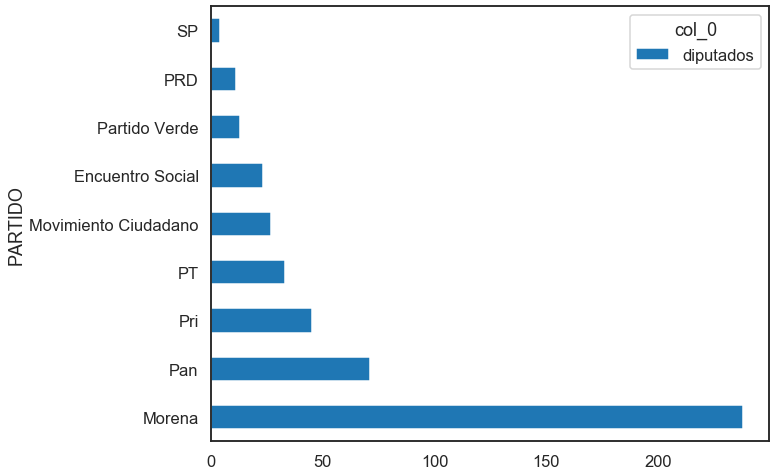

In [163]:
##Cantidad de diputados por partido político
pd.crosstab(data_diputados["PARTIDO"],"diputados").sort_values("diputados", ascending=False).plot(kind="barh", figsize=(10,8))
pd.crosstab(data_diputados["PARTIDO"],"diputados").sort_values("diputados", ascending=False)

col_0,diputados
ESCOLARIDAD,
Licenciatura,182
Maestría,112
Doctorado,29
Pasante,17
Ninguna,16
Secundaria,15
Carrera Trunca,12
Carrera Técnica,11
Especialidad,11


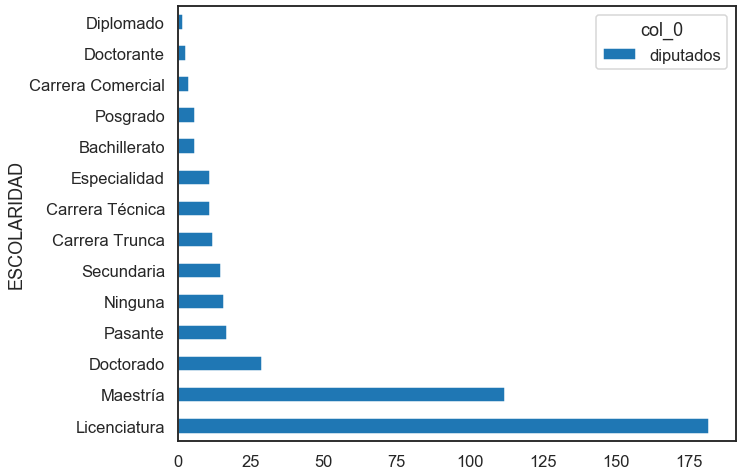

In [164]:
##Niveles de escolaridad
pd.crosstab(data_diputados["ESCOLARIDAD"],"diputados").sort_values("diputados", ascending=False).plot(kind="barh", figsize=(10,8))
pd.crosstab(data_diputados["ESCOLARIDAD"],"diputados").sort_values("diputados", ascending=False)

In [165]:
##NIVELES DE ESCOLARIDAD POR PARTIDO POLÍTICO
pd.crosstab(data_diputados["PARTIDO"],data_diputados["ESCOLARIDAD"])

ESCOLARIDAD,Bachillerato,Carrera Comercial,Carrera Trunca,Carrera Técnica,Diplomado,Doctorado,Doctorante,Especialidad,Licenciatura,Maestría,Ninguna,Pasante,Posgrado,Secundaria
PARTIDO,,,,,,,,,,,,,,
Encuentro Social,0,0,1,0,0,2,0,1,12,6,1,0,0,0
Morena,4,2,8,9,1,8,2,8,91,37,11,15,4,11
Movimiento Ciudadano,0,0,1,0,0,2,1,0,15,7,0,1,0,0
PRD,0,0,0,0,0,2,0,0,3,1,0,0,0,0
PT,1,0,0,2,0,2,0,0,16,5,0,1,0,1
Pan,0,1,1,0,0,5,0,1,25,33,2,0,2,1
Partido Verde,0,0,0,0,0,1,0,0,5,4,2,0,0,0
Pri,1,1,1,0,1,7,0,1,13,18,0,0,0,2
SP,0,0,0,0,0,0,0,0,2,1,0,0,0,0


,TOTAL APROBADAS,TOTAL INICIATIVAS
PARTIDO,,
Encuentro Social,83,672
Morena,2438,6141
Movimiento Ciudadano,147,1685
PRD,23,680
PT,94,747
Pan,608,8687
Partido Verde,82,733
Pri,159,1907
SP,5,73


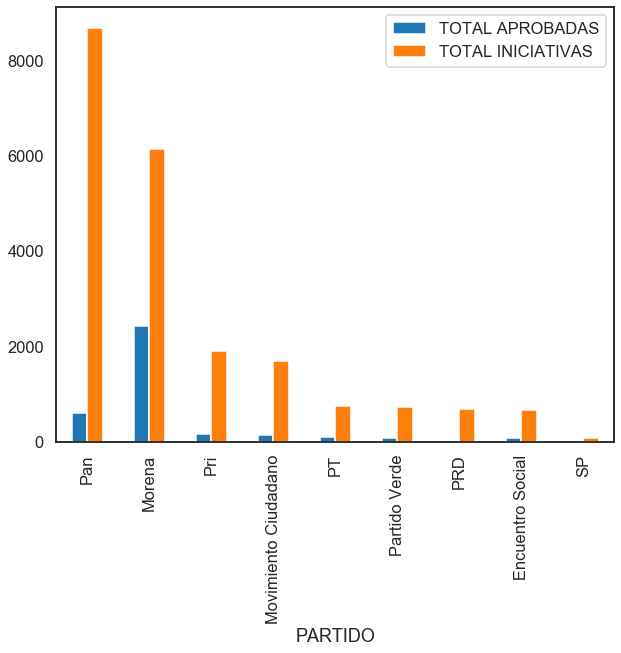

In [166]:
#¿Cómo se ve la cantidad de propuestas realizadas y aprobadas con respecto a?:
    #Partido político
    #Escolaridad

data_diputados.pivot_table(["TOTAL INICIATIVAS","TOTAL APROBADAS"],index = "PARTIDO", 
                   aggfunc = {"TOTAL INICIATIVAS": "sum", "TOTAL APROBADAS": "sum"}).sort_values("TOTAL INICIATIVAS", ascending=False).plot(kind="bar",figsize=(10,8))

data_diputados.pivot_table(["TOTAL INICIATIVAS","TOTAL APROBADAS"],index = "PARTIDO", 
                   aggfunc = {"TOTAL INICIATIVAS": "sum", "TOTAL APROBADAS": "sum"})

,TOTAL APROBADAS,TOTAL INICIATIVAS
ESCOLARIDAD,,
Bachillerato,46,174
Carrera Comercial,32,206
Carrera Trunca,102,441
Carrera Técnica,108,267
Diplomado,15,94
Doctorado,191,1572
Doctorante,30,99
Especialidad,102,432
Licenciatura,1446,8196


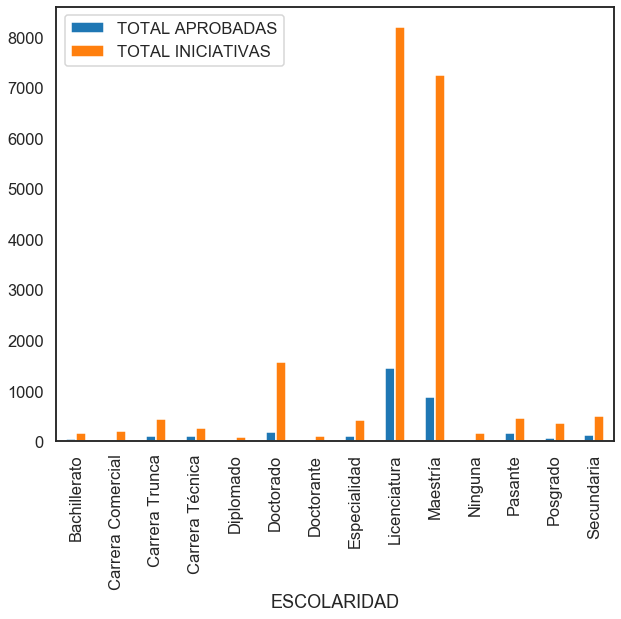

In [167]:
#¿Cómo se ve la cantidad de propuestas realizadas y aprobadas con respecto a?:
    #Escolaridad 
    
data_diputados.pivot_table(["TOTAL INICIATIVAS","TOTAL APROBADAS"],index = "ESCOLARIDAD", 
                   aggfunc = {"TOTAL INICIATIVAS": "sum", "TOTAL APROBADAS": "sum"}).plot(kind="bar", figsize=(10,8))
data_diputados.pivot_table(["TOTAL INICIATIVAS","TOTAL APROBADAS"],index = "ESCOLARIDAD", 
                   aggfunc = {"TOTAL INICIATIVAS": "sum", "TOTAL APROBADAS": "sum"})